In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from random import uniform, shuffle
%matplotlib inline
%matplotlib notebook

<IPython.core.display.Javascript object>


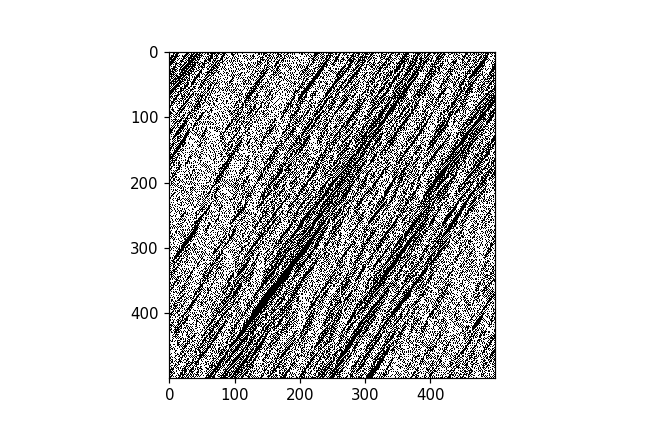

In [2]:
L = 500 # number of cells in row
num_iters = 500 # number of iterations
density = 0.48 # how many positives
vmax = 2
p = 0.2

cars_num = int(density * L)
initial = [0] * cars_num + [-1] * (L - cars_num)
shuffle(initial)

iterations = [initial]

for i in range(num_iters):
    prev,curr = iterations[-1],[-1] * L

    for x in range(L):
        if prev[x] > -1:
            vi = prev[x]
            d = 1
            while prev[(x + d) % L] < 0:
                d += 1

            vtemp = min(vi+1, d - 1, vmax) # increse speed up to max speed, but don't move further than next car
            if uniform(0,1) < p:
                v = max(vtemp - 1, 0) 
            else:
                v = vtemp # with probability p hit the brakes, otherwise sustain velocity
                
            curr[(x + v) % L] = v # perform the move

    iterations.append(curr)


a = np.zeros(shape=(num_iters,L))
for i in range(L):
    for j in range(num_iters):
        if iterations[j][i] > -1: 
            a[j,i] = 1
        else:
            a[j,i] = 0  


plt.imshow(a, cmap="Greys", interpolation="nearest")
plt.show() 